In [6]:
import numpy as np
import pandas as pd
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import shapiro 
from scipy.stats import mannwhitneyu
from scipy.stats import spearmanr
from scipy.stats import kendalltau


**ЗАДАНИЕ 2. ПРОВЕРКА СТАТИСТИЧЕСКИХ ГИПОТЕЗ**

<u>**Раздел 1. Критерий Шапиро-Уилка. Проверка нормальности распределения численности населения в городах России в 1959 году**<u>

2. Загрузите данные из файла town_1959_2.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().

In [7]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/town_1959_2.csv'
df=pd.read_csv(url, encoding="utf-8")
df.head()

,номер,город,население
0,1,Москва,5046.0
1,2,Санкт-Петербург,3003.0
2,3,Нижний_Новгород,941.0
3,4,Новосибирск,885.0
4,5,Самара,806.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   номер      1004 non-null   object 
 1   город      1004 non-null   object 
 2   население  1004 non-null   float64
dtypes: float64(1), object(2)
memory usage: 23.7+ KB


In [9]:
df.describe(include='all')

,номер,город,население
count,1004,1004,1004.000000
unique,1004,987,NaN
top,1,Советск,NaN
freq,1,3,NaN
mean,NaN,NaN,52.925199
std,NaN,NaN,204.885662
min,NaN,NaN,0.100000
25%,NaN,NaN,10.700000
50%,NaN,NaN,19.250000
75%,NaN,NaN,37.975000


3. Постройте гистограмму для логарифма численности населения городов, воспользовавшись функцией log10 из модуля numpy для логарифмирования и функцией hist() из модуля matplotlib.pyplot. Сделайте предположение о нормальности прологарифмированных данных.

<AxesSubplot: ylabel='Frequency'>

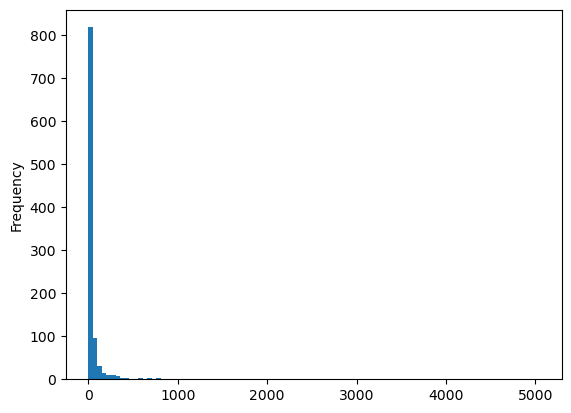

In [10]:
df['население'].plot(kind = 'hist', bins=100)

<AxesSubplot: ylabel='Frequency'>

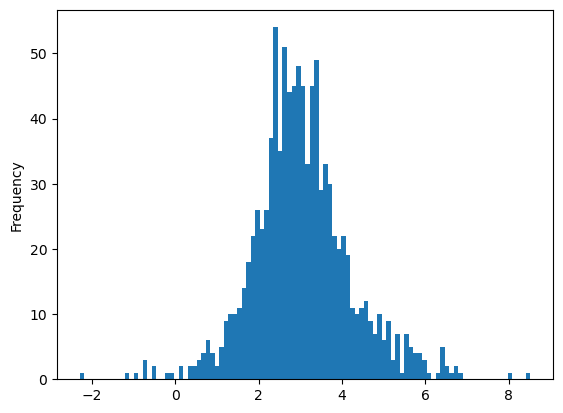

In [11]:
x=np.log(df['население'])
x.plot(kind = 'hist', bins=100)

4. Проведите проверку гипотезы о нормальности распределения прологарифмированных данных на основе критерия Шапиро-Уилка, воспользовавшись функцией shapiro() из модуля scipy.stats. Прокомментируйте результат.

In [12]:
x=np.array(df['население'])
shapiro_result=shapiro(x)
print(shapiro_result)

ShapiroResult(statistic=0.16436320543289185, pvalue=0.0)


***Вывод: Нулевая гипотеза H0, что данные нормально распределены отвергнута, так как pvalue=0.0 < a (уровня значимости).***

<u>**Раздел 7. Критерий Манна-Уитни. Сравнение медиан цен домов в Альбукерке, расположенных на углу и не на углу улицы**<u>

41. Загрузите данные из файла Albuquerque Home Prices_data.txt с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().

In [13]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/Albuquerque%20Home%20Prices_data.txt'
df1=pd.read_csv(url, sep='\t')
df1.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13,7,1,1,0,1639
1,2080,2600,-9999,4,1,1,0,1088
2,2150,2664,6,5,1,1,0,1193
3,2150,2921,3,6,1,1,0,1635
4,1999,2580,4,4,1,1,0,1732


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PRICE   117 non-null    int64
 1   SQFT    117 non-null    int64
 2   AGE     117 non-null    int64
 3   FEATS   117 non-null    int64
 4   NE      117 non-null    int64
 5   CUST    117 non-null    int64
 6   COR     117 non-null    int64
 7   TAX     117 non-null    int64
dtypes: int64(8)
memory usage: 7.4 KB


In [15]:
df1.describe()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,1062.735043,1653.854701,-4178.914530,3.529915,0.666667,0.230769,0.188034,-128.948718
std,380.436985,523.722802,4961.782238,1.405486,0.473432,0.423137,0.392420,3044.626782
min,540.000000,837.000000,-9999.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000
25%,780.000000,1280.000000,-9999.000000,3.000000,0.000000,0.000000,0.000000,553.000000
50%,960.000000,1549.000000,4.000000,4.000000,1.000000,0.000000,0.000000,701.000000
75%,1200.000000,1894.000000,15.000000,4.000000,1.000000,0.000000,0.000000,899.000000
max,2150.000000,3750.000000,53.000000,8.000000,1.000000,1.000000,1.000000,1765.000000


42. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.

In [16]:
df1=df1.replace(-9999, np.nan)
df1.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


43. Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную x – цену домов, расположенных на углу улицы (COR = 1), и в переменную y – цену домов, расположенных не на углу улицы (COR = 0).

In [17]:
mask1=df1['COR']==1
x=df1[mask1]['PRICE']
x

17     1110
18     1139
23      900
26     1695
30     1020
31     1020
33      925
44      725
49     1299
50     1250
63      835
65      805
67      750
78     1295
79      975
84      700
95      699
96     1330
104    1000
105    1030
115     766
116     739
Name: PRICE, dtype: int64

In [18]:
mask0=df1['COR']==0
y=df1[mask0]['PRICE']
y

0      2050
1      2080
2      2150
3      2150
4      1999
       ... 
110     945
111     874
112     872
113     870
114     869
Name: PRICE, Length: 95, dtype: int64

44. Нанесите на одну диаграмму 2 гистограммы для сравниваемых типов домов. Воспользуйтесь при этом функцией hist() и функцией legend() из модуля matplotlib.pyplot. Сделайте вывод о нормальности распределений данных двух выборок.

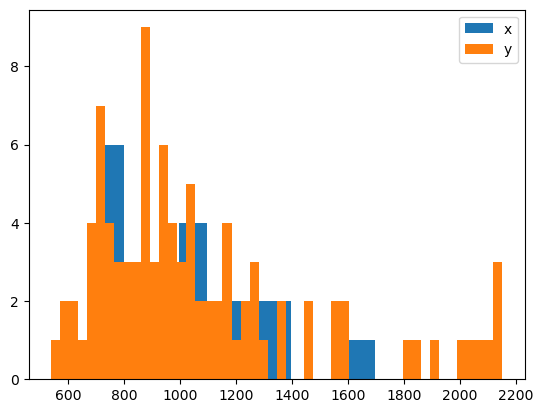

In [19]:

plt.hist(x, bins=10, label='x')
plt.hist(y, bins=50, label='y')
plt.legend(loc='upper right')
plt.show()

***Вывод: Визуально - распределение выборок отличается от нормального.***

45. Сравните медианы двух выборок на основе критерия Манна-Уитни. Воспользуйтесь при этом функцией mannwhitneyu() из модуля scipy.stats. Прокомментируйте результат.

In [20]:
U1, p = mannwhitneyu(x, y, method="exact")
U1, p 

(1009.0, 0.8057629370139444)

In [21]:
U2 = len(x)*len(y) -U1
U2


1081.0

***Вывод: Нулевая гипотеза Н0 (что распределение лежащее в основе выборки х совпадает с распределением, лежащим в основе выборки у) не отвергается, так как pvalue=0.8>a (уровня значимости).***

<U>**Раздел 2. Коэффициенты корреляции. Взаимосвязь цены и площади домов в Альбукерке**<U>

5. Загрузите данные из файла Albuquerque Home Prices_data.txt с помощью функции read_csv() из модуля pandas. Замените значение -9999, которое здесь употребляется в качестве пустого значения, на корректное пустое значение nan из модуля numpy. Воспользуйтесь при этом функцией replace(). Выведите на экран первые 5 наблюдений преобразованных данных.

In [22]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/Albuquerque%20Home%20Prices_data.txt'
df2=pd.read_csv(url, sep='\t')
df2=df2.replace(-9999, np.nan)
df2.head()

,PRICE,SQFT,AGE,FEATS,NE,CUST,COR,TAX
0,2050,2650,13.0,7,1,1,0,1639.0
1,2080,2600,NaN,4,1,1,0,1088.0
2,2150,2664,6.0,5,1,1,0,1193.0
3,2150,2921,3.0,6,1,1,0,1635.0
4,1999,2580,4.0,4,1,1,0,1732.0


6. Проверьте очевидный факт, что площадь дома коррелирует с его ценой. Постройте диаграмму рассеяния для переменных цена ('PRICE') и площадь дома ('SQFT'). Воспользуйтесь при этом функцией scatter() из модуля matplotlib.pyplot. Прокомментируйте полученный результат.

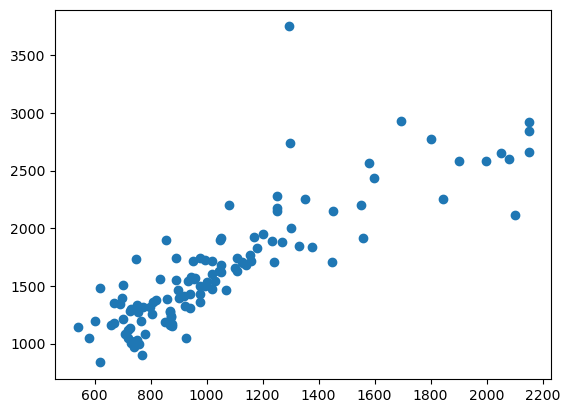

In [23]:
plt.scatter(df2["PRICE"], df2["SQFT"])
plt.show()

7. Проверьте свою гипотезу аналитически с помощью коэффициента корреляции Пирсона. Воспользуйтесь при этом функцией pearsonr() из модуля scipy.stats. Прокомментируйте результат.

In [24]:
from scipy.stats import pearsonr
res = pearsonr(df2["PRICE"], df2["SQFT"])
res


PearsonRResult(statistic=0.8447950985552122, pvalue=5.1463457076293854e-33)

***Вывод: проверка нулевой гипотезы о том, что распределения, лежащие в основе выборок, являются некоррелированными и нормально распределенными - нулевую гипотезу отклоняем, так как pvalue<<a.***

8.	Вычислите частную корреляцию между ценой и площадью дома при фиксированных значениях суммы налога. Вам понадобится модуль pingouin, который можно установить с помощью команды !pip install pingouin. Воспользуйтесь функцией partial_corr(data=df, x='PRICE', y='SQFT', covar='TAX') из модуля pingouin. Прокомментируйте полученный результат.

In [25]:
pg.partial_corr(data=df2, x='PRICE', y='SQFT', covar='TAX').round(3)


,n,r,CI95%,p-val
pearson,107,0.368,"[0.19, 0.52]",0.0


***Вывод: Н0 отвергается, есть статистически выявленная связь между ценой домой и площадью при фиксированной ставке налога. связь между ценой и площадью дома не зависит от суммы налога***

9.	Вычислите ранговый коэффициент корреляции Спирмена по данным о цене и площади дома. Воспользуйтесь при этом функцией spearmanr() из модуля scipy.stats. Прокомментируйте результат.

In [26]:
res_spearmanr=spearmanr(df2["PRICE"], df2["SQFT"])
res_spearmanr

SignificanceResult(statistic=0.8741686749512637, pvalue=7.116503153899996e-38)

10.	Вычислите ранговый коэффициент корреляции Кендалла по данным о цене и площади дома. Воспользуйтесь при этом функцией kendalltau() из модуля scipy.stats. Прокомментируйте результат.

In [27]:
res_kendalltau=kendalltau(df2["PRICE"], df2["SQFT"])
res_kendalltau

SignificanceResult(statistic=0.6954339958374737, pvalue=1.4484759425566461e-28)

<u>**Раздел 3. Критерии хи-квадрат, Мак-Нимара и z критерий серий**<u>

**Раздел 3.1. Критерий хи-квадрат для анализа классификации. Отношение к мораторию на смертную казнь**


11.	Из 50 опрошенных по поводу отношения к введению моратория на смертную казнь 30 были "за", 20 - "против" (предполагается, что выборка репрезентативна генеральной совокупности). Можно ли утверждать на основании этого опроса, что в совокупности количество сторонников превышает количество противников введения моратория на смертную казнь?

12.	Вычислите критерий хи-квадрат Пирсона по имеющимся данным о распределении голосов. Сравните его с равномерным распределением. Воспользуйтесь при этом функцией chisquare([30, 20]) из модуля scipy.stats. Прокомментируйте результат.

In [28]:
from scipy.stats import chisquare

chisquare([30,20])

Power_divergenceResult(statistic=2.0, pvalue=0.15729920705028105)

***Вывод: Н0 не отвергается. Эмпирическое распределение соответствует равномерному распределению.***

13.	Предположим, что опрошено не 50, а 100 человек, и соотношение высказавшихся "за" и "против" сохранилось. Тогда эмпирические частоты составили бы 60 "за" и 40 "против", а соответствующие теоретические частоты равнялись бы 50. Изменится ли статистический вывод?

In [29]:
chisquare([60,40])

Power_divergenceResult(statistic=4.0, pvalue=0.04550026389635857)

***Вывод: Н0 отвергается. Численность сторонников на смертную казнь выше противников.***

14. В качестве ожидаемого (теоретического) распределения может выступать не обязательно равномерное распределение. Например, требуется проверить, что число сторонников введения моратория составляет не менее 80%. Воспользуйтесь функцией chisquare([60, 40], f_exp=[80, 20]) из модуля scipy.stats. Прокомментируйте результат.

In [30]:
chisquare([60,40], f_exp=[80, 20])

Power_divergenceResult(statistic=25.0, pvalue=5.733031437583874e-07)

***Вывод: Н0 отвергается. "Эмпирическая численность голосов отличается от теоритичекого, требуемая пропорция не соблюдается.***

<u>**Раздел 3.2. Критерий хи-квадрат для анализа таблиц сопряженности. Зависимость политических предпочтений от пола**<u>

15.	Был проведен опрос, в ходе которого для каждого респондента репрезентативной выборки определены пол и один из пяти предпочитаемых политических лидеров. Количество высказавшихся за  каждого из пяти политических лидеров среди мужского пола - [5, 25, 10, 8, 3]. Среди женского пола - [11, 12, 19, 5, 7]. Постройте на основе этих данных таблицу сопряженности, где в строках указан пол, а в столбцах один из пяти лидеров. Проверьте гипотезу о зависимости политических предпочтений от пола респондента с использованием критерия хи-квадрат.

16.	Сначала постройте таблицу сопряжённости, в которой будет указано количество респондентов мужского пола ('male') и женского пола ('female'), высказавшихся за одного из пяти политических лидеров, указанных в столбце таблицы ('leader_1' - 'leader_5'). Воспользуйтесь при этом функцией DataFrame() из модуля pandas. Результат запишите в переменную contingency_table. Выведите ее содержимое  на экран.

In [31]:
contingency_table=pd.DataFrame([[5, 25, 10, 8, 3], [11, 12, 19, 5, 7]], index=['male', 'female'], columns=['leader_1', 'leader_2', 'leader_3', 'leader_4', 'leader_5'])
contingency_table

,leader_1,leader_2,leader_3,leader_4,leader_5
male,5,25,10,8,3
female,11,12,19,5,7


17.	На основе таблицы сопряженности проверьте с помощью критерия хи-квадрат гипотезу о равенстве долей респондентов, высказавшихся за и против кандидата. Воспользуйтесь при этом функцией chi2_contingency(contingency_table, correction=False) из модуля scipy.stats. Прокомментируйте результат.

In [32]:
from scipy.stats import chi2_contingency
chi2_contingency(contingency_table, correction=False)

Chi2ContingencyResult(statistic=11.826919050232945, pvalue=0.01868583819588996, dof=4, expected_freq=array([[ 7.77142857, 17.97142857, 14.08571429,  6.31428571,  4.85714286],
       [ 8.22857143, 19.02857143, 14.91428571,  6.68571429,  5.14285714]]))

***Вывод: Н0 отвергается (о независимости). Зависимость от пола респондентов есть .***

<u>**Раздел 3.3. Критерий хи-квадрат для анализа таблиц сопряженности 2 на 2 для независимых выборок. Популярность кандидата**<u>

18.	В регионе ожидаются выборы. Команда кандидата проводит опрос, в результате которого в поддержку кандидата выказалось 28% из 100 опрошенных в городе и 20% из 100 опрошенных на селе. Нужно выяснить, является ли эта разница статистически значимой, и нужно ли разворачивать дополнительную рекламную кампанию на селе. Проверять гипотезу о равенстве распределений будем с использованием критерия хи-квадрат.

19.	Сначала постройте таблицу сопряжённости, в которой будут указаны доли высказавшихся за ('for') и против ('against') кандидата в разрезе города ('city') и села ('country'). Воспользуйтесь при этом функцией DataFrame() из модуля pandas. Выведите ее на экран.

In [33]:
contingency_table=pd.DataFrame([[28,72], [20, 80]], index=['city', 'country'], columns=['for', 'against'])
contingency_table

,for,against
city,28,72
country,20,80


20. На основе таблицы сопряженности проверьте с помощью критерия хи-квадрат гипотезу о равенстве долей респондентов, высказавшихся за и против кандидата. Воспользуйтесь при этом функцией chi2_contingency() из модуля scipy.stats. Прокомментируйте результат

In [34]:
chi2_contingency(contingency_table, correction=True)

Chi2ContingencyResult(statistic=1.3432017543859647, pvalue=0.2464701206916715, dof=1, expected_freq=array([[24., 76.],
       [24., 76.]]))

***Вывод: Н0 не отвергается. Следовательно - доля высказавшихся в городах и селах примерно ожинаковая (статистически значимо не различаются).***

<u>**Раздел 3.4. Критерий Мак-Нимара для анализа таблиц сопряженности 2 на 2 для зависимых выборок. Оценка убедительности рекламы политической партии**<u>

22.	Загрузите данные из файла по адресу https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/agpp.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().

21.	Имеется следующий набор данных. Сформирована выборка респондентов из 100 человек. Их спросили, проголосуют ли они за одну из австралийских политических партий. Затем им дали послушать рекламу этой политической партии и попросили ответить на тот же вопрос повторно. Ваша задача - оценить убедительность рекламы политической партии.

In [35]:
url='https://raw.githubusercontent.com/ethanweed/pythonbook/main/Data/agpp.csv'
df=pd.read_csv(url)
df.head()

,id,response_before,response_after
0,subj.1,no,yes
1,subj.2,yes,no
2,subj.3,yes,no
3,subj.4,yes,no
4,subj.5,no,no


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               100 non-null    object
 1   response_before  100 non-null    object
 2   response_after   100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


In [37]:
df.describe(include='all')

,id,response_before,response_after
count,100,100,100
unique,100,2,2
top,subj.1,no,no
freq,1,70,90


23.	Запишите в переменные observed и stats результаты применения теста Мак-Нимара. Воспользуйтесь при этом функцией chi2_mcnemar(df, 'response_before', 'response_after') из модуля pingouin.

In [38]:
observed, stats= pg.chi2_mcnemar(df, 'response_before', 'response_after')

24.	Выведите на экран содержимое переменной observed. Прокомментируйте результат.

In [39]:
print(observed)

response_after    0  1
response_before       
0                65  5
1                25  5


25. Выведите на экран содержимое переменной stats. Прокомментируйте результат.

In [40]:
print(stats)

              chi2  dof  p-approx   p-exact
mcnemar  12.033333    1  0.000523  0.000325


***Вывод: Н0 отвергается. Рекламная акция убедительна.***

<u>**Раздел 3.5. Критерий серий z. Оценка различий в интеллекте**<U>

26.	Предположим, что показатель интеллекта IQ некоторой выборки имеет нормальное распределение со средним 100 и стандартным отклонением 15. Требуется проверить, влияет ли новая таблетка на показатель IQ. С этой целью было опрошено 20 респондентов, показатели которых имеют следующий вид: data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115].

In [41]:
data = [88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 115]

27.	Примените одновыборочный z тест. Воспользуйтесь при этом функцией ztest(data, value=100) из модуля statsmodels.stats.weightstats. Прокомментируйте результат.

In [42]:
from statsmodels.stats.weightstats import ztest
ztest(data, value=100)

(1.5976240527147705, 0.11012667014384257)

***Вывод: Н0 не отвергается.***

28.	Предположим, что показатель интеллекта IQ жителей двух городов имеет нормальное распределение. Требуется проверить, отличаются ли жители городов по уровню интеллекта. С этой целью было опрошено по 20 респондентов из каждого города, их показатели имеют следующий вид:
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114].
cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133].


In [43]:
cityA = [82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 109, 109, 110, 112, 112, 113, 114, 114]
cityB = [90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 115, 116, 117, 117, 128, 129, 130, 133]


29.	Примените двухвыборочный z тест. Воспользуйтесь при этом функцией ztest(cityA, cityB, value=0) из модуля statsmodels.stats.weightstats. Прокомментируйте результат.


In [44]:
ztest(cityA, cityB, value=0)

(-1.9953236073282115, 0.046007596761332065)

***Вывод: Н0 отвергается. Средний IQ уровень существенно отличается в городах А и В***

!!!!<u>**Раздел 4. Одновыборочный критерий Стьюдента. Оценка способности к подавлению импульсивных поведенческих реакций**<u>

Загрузите данные из файла ADHD.txt с помощью функции read_csv() из модуля pandas. Дайте названия столбцам, обратившись к атрибуту columns: 'Placebo', 'Methylphenidate'. Здесь 'Placebo' – сведения о пациентах, принимающих плацебо, 'Methylphenidate' – о принимающих лекарство.  Посмотрите на первые 5 наблюдений с помощью функции head().

In [45]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/ADHD.txt'
df2=pd.read_csv(url, sep=' ')
df2.head()


,D0,D60
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


In [46]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   D0      24 non-null     int64
 1   D60     24 non-null     int64
dtypes: int64(2)
memory usage: 512.0 bytes


In [47]:
df2.describe()

,D0,D60
count,24.000000,24.000000
mean,39.750000,44.708333
std,11.314669,12.319935
min,26.000000,29.000000
25%,33.000000,35.000000
50%,36.000000,42.500000
75%,44.500000,52.500000
max,71.000000,77.000000


In [48]:


df2=df2.rename(columns={'D0':'Placebo', 'D60':'Methylphenidate'})
df2.head()

,Placebo,Methylphenidate
0,57,62
1,27,49
2,32,30
3,31,34
4,34,38


Примените одновыборочный критерий Стьюдента для проверки гипотезы о равенстве 50 способности к подавлению импульсивных поведенческих реакций пациентами, принимающими плацебо. Воспользуйтесь при этом функцией ttest_1samp(data.Placebo, 50.0) из модуля scipy.stats.  Прокомментируйте результат.

In [49]:
from scipy.stats.mstats import ttest_1samp
res = ttest_1samp(df2['Placebo'], 50.0)
res

Ttest_1sampResult(statistic=-4.438003341905128, pvalue=0.00018894293251080175)

<u>**Раздел 5. Критерий Стьюдента для независимых выборок. Возраст, в котором умирают европейские аристократы**<u>

32. Загрузите данные из файла agedeath.dat.txt с помощью функции read_csv() из модуля pandas. Через атрибут names функции read_csv() укажите названия столбцов - 'group', 'age', 'index'. Посмотрите на первые 5 наблюдений с помощью функции head().

In [50]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/agedeath.dat.txt'
df=pd.read_csv(url, delim_whitespace=True)
df.columns=['group', 'age', 'index']


df.head()

,group,age,index
0,aris,21,2
1,aris,21,3
2,aris,21,4
3,aris,21,5
4,aris,21,6


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6185 entries, 0 to 6184
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   group   6185 non-null   object
 1   age     6185 non-null   int64 
 2   index   6185 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 145.1+ KB


In [52]:
df.describe(include='all')

,group,age,index
count,6185,6185.000000,6185.000000
unique,3,NaN,NaN
top,gent,NaN,NaN
freq,2455,NaN,NaN
mean,NaN,57.681487,1079.667745
std,NaN,17.499180,664.744207
min,NaN,21.000000,1.000000
25%,NaN,45.000000,516.000000
50%,NaN,60.000000,1032.000000
75%,NaN,71.000000,1600.000000


In [53]:
df.group.value_counts()

gent    2455
aris    2290
sovr    1440
Name: group, dtype: int64

33. Данные содержат информацию о продолжительности жизни следующих классов: суверенитет ('sovr'), аристократия ('aris') и дворянство ('gent'). Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную x – возраст смерти класса 'sovr', а в переменную y – возраст смерти класса 'aris'.

In [54]:
mask1=df['group']=='sovr'
x = df[mask1]['age']
x

4745     21
4746     21
4747     21
4748     21
4749     21
       ... 
6180     95
6181     95
6182     97
6183    100
6184    101
Name: age, Length: 1440, dtype: int64

In [55]:
mask2=df['group']=='aris'
y = df[mask2]['age']
y

0        21
1        21
2        21
3        21
4        21
       ... 
2285     98
2286     98
2287     99
2288    100
2289    102
Name: age, Length: 2290, dtype: int64

34. Нанесите на одну диаграмму 2 гистограммы для сравниваемых классов. Воспользуйтесь при этом функцией hist() и функцией legend() из модуля matplotlib.pyplot. Сделайте вывод о нормальности распределений данных двух выборок.

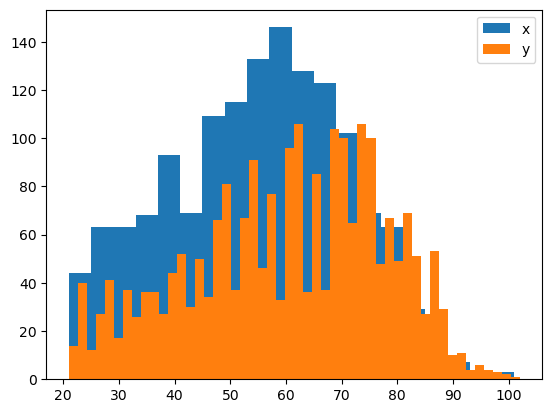

In [56]:
plt.hist(x, bins=20, label='x')
plt.hist(y, bins=50, label='y')
plt.legend(loc='upper right')
plt.show()

35. Проверьте гипотезу о равенстве дисперсий на основе критерия Флигнера-Килина. Воспользуйтесь при этом функцией fligner() из модуля scipy.stats. Прокомментируйте результат.

In [57]:
from scipy.stats import fligner
fligner(x, y)

FlignerResult(statistic=14.848620367019672, pvalue=0.00011649324915307631)

***Вывод: Н0 отвергается. Дисперсии различны.***

36.	Проверьте гипотезу о равенстве средних значений двух независимых классов на основе критерия Стьюдента для независимых выборок. Воспользуйтесь при этом функцией ttest_ind() из модуля scipy.stats. В параметре equal_var этой функции укажите, равны дисперсии (True) или нет (False), опираясь на результаты проверки из п. 15. Прокомментируйте результат.

In [58]:
from scipy.stats import ttest_ind
ttest_ind(x, y, equal_var = False)

Ttest_indResult(statistic=-10.791917817363439, pvalue=1.0654328795859108e-26)

***Вывод: Н0 отвергается.***

<u>**Раздел 6. Критерий Стьюдента для парных выборок. Скорость чтения названий цветов**<u>

37. Загрузите данные из файла interference.csv с помощью функции read_csv() из модуля pandas. Посмотрите на первые 5 наблюдений с помощью функции head().

In [59]:
url='https://raw.githubusercontent.com/kintis/HomeWork/main/interference.csv'
df=pd.read_csv(url, sep=',')
df.head()

,Subj,DiffCol,Black
0,1,39.64,37.53
1,2,44.26,42.02
2,3,33.84,31.99
3,4,53.88,39.48
4,5,38.94,43.09


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Subj     70 non-null     int64  
 1   DiffCol  70 non-null     float64
 2   Black    70 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.8 KB


In [61]:
df.describe()

,Subj,DiffCol,Black
count,70.000000,70.000000,70.000000
mean,35.500000,43.300143,41.000143
std,20.351085,6.149710,4.840233
min,1.000000,29.130000,29.850000
25%,18.250000,38.760000,38.195000
50%,35.500000,44.330000,40.965000
75%,52.750000,46.962500,44.447500
max,70.000000,56.550000,52.210000


38. Данные содержат информацию о скорости чтения названий цветов в зависимости от того, шрифт какого цвета использовался. В столбце 'DiffCol' указана скорость чтения цветного шрифта, а в столбце 'Black' - черно-белого. Сохраните в отдельные переменные выборки, которые собираетесь сравнивать, а именно в переменную x – скорость чтения названий цветов с цветным шрифтом, а в переменную y – скорость чтения названий цветов с черно-белым шрифтом.

In [62]:
x=df['DiffCol']
y=df['Black']

39. Посмотрите на гистограммы переменных x и y. Сделайте вывод о нормальности их распределений и о возможности применения критерия Стьюдента для сравнения средних.

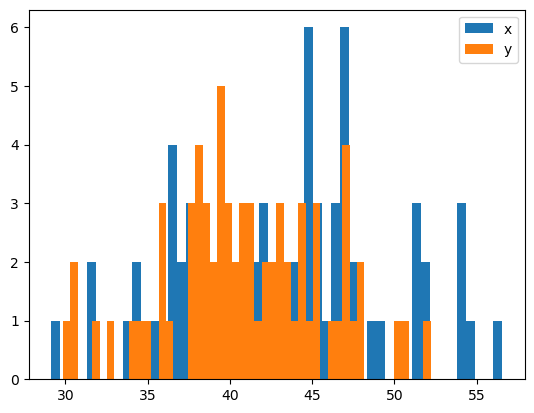

In [63]:
plt.hist(x, bins=50, label='x')
plt.hist(y, bins=50, label='y')
plt.legend(loc='upper right')
plt.show()

40. Проверьте гипотезу о равенстве средних значений двух зависимых выборок на основе критерия Стьюдента для зависимых выборок. Воспользуйтесь при этом функцией ttest_rel() из модуля scipy.stats. Прокомментируйте результат.

In [64]:
from scipy.stats import ttest_rel
ttest_rel(x, y)


TtestResult(statistic=2.463853781331113, pvalue=0.0162416779538072, df=69)

***Вывод: Н0 отвергается, так как pvalue<a.***


<u>**Раздел 8. Критерий T-Вилкоксона (критерий знаков). Сравнение медиан оценок привлекательности продукта до и после просмотра рекламы**<u>

46.	Предположим, что перед нами стоит задача сравнить оценки привлекательности продукта до и после просмотра рекламы. Мы знаем, что распределения оценок отличаются от нормального. Поэтому требуется сравнить медианы оценок в двух связанных выборках. 

47.	Выборки будут искусственные. Чтобы результат был воспроизводимым, с помощью функции seed() из модуля numpy.random зададим счетчик случайных чисел. Пусть он принимает значение 1.

In [65]:
np.random.seed(1)

48.	Сгенерируем 2 выборки оценок продукта (data1, data2), по 100 наблюдений в каждой, путем добавления к медиане каждой выборки случайного числа из равномерного распределения в интервале от 0 до 10. Пусть медиана 1-ой выборки равна 50, а 2-ой – 51. Заданное количество случайных чисел (100) из равномерного распределения в интервале от 0 до 1 можно сгенерировать с помощью функции rand(100) из модуля numpy.random. Преобразуйте найденное число так, чтобы перейти к нужному интервалу чисел (от 0 до 10). Выведите на экран по 5 наблюдений из каждой выборки.

In [66]:
data1 = 50 + (np.random.rand(100)*10)
data1[:5]

array([54.17022005, 57.20324493, 50.00114375, 53.02332573, 51.46755891])

In [67]:
data2 = 51 + (np.random.rand(100)*10)
data2[:5]

array([54.26644902, 56.27058102, 59.85942099, 54.5726976 , 60.08535151])

49. Сравните медианы двух связанных выборок на основе критерия T-Вилкоксона. Воспользуйтесь при этом функцией wilcoxon(data1, data2) из модуля scipy.stats. Прокомментируйте результат.

In [68]:
from scipy.stats import wilcoxon
wilcoxon(data1, data2)

WilcoxonResult(statistic=1937.0, pvalue=0.043203735179544844)

***Вывод: Н0 отвергается, гипотеза о равенстве медиан не подтвердилась. Медианы отличаются статистически значимо.***

<u>**Раздел 9. Дисперсионный анализ (ANOVA). Сравнение средней цены продукта в трех регионах**<u>

50.	Предположим, что перед нами стоит задача сравнить цены продукта в трех регионах. Мы знаем, что распределения цен не существенно отличаются от нормального, дисперсии примерно одинаковые. Поэтому требуется сравнить средние величины в трех независимых выборках, что возможно с помощью дисперсионного анализа. 

51.	Выборки будут искусственные. Чтобы результат был воспроизводимым, с помощью функции seed() из модуля numpy.random зададим счетчик случайных чисел. Пусть он принимает значение 1.

In [69]:
np.random.seed(1)

52.	Сгенерируем 3 выборки цен продукта (data1, data2, data3), по 100 наблюдений в каждой, путем добавления к средней каждой выборки случайного числа из стандартного нормального распределения, увеличенного в 5 раз. Пусть средняя 1-ой выборки равна 50, 2-ой – 50, 3-й - 52. Заданное количество случайных чисел (100) из стандартного нормального распределения можно сгенерировать с помощью функции randn(100) из модуля numpy.random. Умножьте найденное число на 5. Выведите на экран по 5 наблюдений из каждой выборки.

In [70]:
data1 = 50 + np.random.randn(100)*5
data2 = 50 + np.random.randn(100)*5
data3 = 52 + np.random.randn(100)*5

In [71]:
data1[:5]


array([58.12172682, 46.94121793, 47.35914124, 44.63515689, 54.32703815])

In [72]:
data2[:5]


array([47.76435718, 56.12253852, 52.01745821, 52.96789262, 44.52544077])

In [73]:
data3[:5]


array([49.99560904, 56.12002809, 49.18847284, 61.77439038, 45.34024167])

53.	Сравните средние трех независимых выборок с помощью дисперсионного анализа. Воспользуйтесь при этом функцией f_oneway(data1, data2, data3) из модуля scipy.stats. Прокомментируйте результат.

In [74]:
from scipy.stats import f_oneway
f_oneway(data1, data2, data3)

F_onewayResult(statistic=3.6545375499692327, pvalue=0.027043909170728186)

***Вывод: Н0 отвергается, гипотеза о равенстве средних не подтвердилась. Средние отличаются статистически значимо.***

<u>**Раздел 10. H-Краскала-Уолеса. Сравнение медиан цен продукта в трех регионах**<u>

54.	Предположим, что перед нами стоит задача сравнить цены продукта в трех регионах. Мы знаем, что распределения цен отличаются от нормального, а также, что более существенно, дисперсии разные. Поэтому требуется сравнить медианы в трех независимых выборках, что возможно с помощью непараметрического аналога дисперсионного анализа – теста H-Краскала-Уолеса. 

55.	Выборки будут искусственные. Чтобы результат был воспроизводимым, с помощью функции seed() из модуля numpy.random зададим счетчик случайных чисел. Пусть он принимает значение 1.

In [75]:
np.random.seed(1)

56.	Сгенерируем 3 выборки оценок продукта (data1, data2, data3), по 100 наблюдений в каждой, путем добавления к медиане каждой выборки случайного числа из равномерного распределения в интервале от 0 до 10. Пусть медиана 1-ой выборки равна 50, 2-ой – 51, 3-й - 52. Заданное количество случайных чисел (100) из равномерного распределения в интервале от 0 до 1 можно сгенерировать с помощью функции rand(100) из модуля numpy.random. Преобразуйте найденное число так, чтобы перейти к нужному интервалу чисел (от 0 до 10). Выведите на экран по 5 наблюдений из каждой выборки.

In [76]:
data1 = 50 + np.random.rand(100)*10
data2 = 51 + np.random.rand(100)*10
data3 = 52 + np.random.rand(100)*10

In [77]:
data1[:5]

array([54.17022005, 57.20324493, 50.00114375, 53.02332573, 51.46755891])

In [78]:
data2[:5]

array([54.26644902, 56.27058102, 59.85942099, 54.5726976 , 60.08535151])

In [79]:
data3[:5]

array([61.50176119, 57.56653188, 61.1560635 , 58.41566209, 55.90007714])

57. Сравните медианы трех независимых выборок на основе критерия H-Краскала-Уолеса. Воспользуйтесь при этом функцией kruskal(data1, data2, data3) из модуля scipy.stats. Прокомментируйте результат.

In [80]:
from scipy.stats import kruskal
kruskal(data1, data2, data3)

KruskalResult(statistic=34.74654883720939, pvalue=2.8502489044096515e-08)

***Вывод: Н0 отвергается, гипотеза о равенстве медиан не подтвердилась. медианы отличаются статистически значимо.***

<u>**Раздел 11. Хи-квадрат Фридмана. Сравнение медиан цен продукта в регионе в разные периоды времени**<u>

58.	Предположим, что перед нами стоит задача сравнить цены продукта в регионе в разные периоды времени, пусть 3 месяца. Мы знаем, что распределения цен отличаются от нормального, а также, что более существенно, дисперсии разные. Поэтому требуется сравнить медианы в трех зависимых выборках, что возможно с помощью непараметрического аналога дисперсионного анализа с повторными измерениями – теста хи-квадрат Фридмана. 

59.	Предположим, что созданные нами в предыдущем случае выборки data1, data2, data3 (п. 37) содержат цены продукта в регионе в разные периоды времени, пусть за январь, февраль и март.

60. Сравните медианы трех зависимых выборок на основе критерия хи-квадрат Фридмана. Воспользуйтесь при этом функцией friedmanchisquare(data1, data2, data3) из модуля scipy.stats. Прокомментируйте результат.

In [81]:
from scipy.stats import friedmanchisquare
friedmanchisquare(data1, data2, data3)

FriedmanchisquareResult(statistic=36.24000000000001, pvalue=1.3507780286373922e-08)

***Вывод: Н0 отвергается, гипотеза о равенстве медиан не подтвердилась. медианы отличаются статистически значимо.***

<u>**Раздел 12. Анализ мощности для критерия Стьюдента для независимых выборок**<u>

61.	Допустим, вы интересуетесь влиянием разговоров по мобильному телефону на время реакции водителя. Вы создали выборку из людей, случайно отнесенных к той или иной экспериментальной группе. В первой группе участники исследования при работе на тренажере реагировали на ряд сложных для водителя ситуаций, разговаривая по мобильному телефону. Во второй группе люди выполняли то же задание, но уже без мобильного телефона. Для каждого человека регистрировали общее время реакции. Вы используете двухсторонний тест Стьюдента для независимых выборок, чтобы сравнить среднее время реакции для водителей с мобильным телефоном и для водителей без отвлекающих факторов.

62. Предположим, по предыдущим исследованиям вам известно, что стандартное отклонение времени реакции составляет 1,25 секунды. Также предположим, что различие во времени реакции на 1 секунду считается существенным. Таким образом, вам хотелось бы провести исследование, в котором можно было обнаружить эффект величиной d=((μ_1-μ_2 ))/σ=1/1.25=0.8  или больше, где μ_1 – среднее значение для 1-й группы, μ_2 – среднее значение для 2-й группы, σ – стандартное отклонение общей ошибки. В дополнение к этому вы хотите быть уверенными на 90% в том, что действительно обнаружите различия, если они существуют, и на 95% - в том, что вы не назовете значимым то различие, которое на самом деле является результатом случайных флуктуаций. Сколько человек вам нужно обследовать?

In [82]:
effect = 0.8
power = 0.9
alpha= 0.05

63.	Создайте класс анализа мощности для критерия Стьюдента с помощью функции TTestIndPower(). Результат запишите в переменную analysis.

In [83]:
from statsmodels.stats.power import TTestIndPower
analysis = TTestIndPower()

64.	Проведите анализ мощности для поиска объема выборки, воспользовавшись функцией solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha, alternative='two-sided'). Прокомментируйте результат.

In [84]:
result = analysis.solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha, alternative='two-sided')
result

c:\Users\Iuliia\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
c:\Users\Iuliia\miniconda3\lib\site-packages\scipy\stats\_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


33.82554233183193

***Вывод: в каждой выборке должно быть включено по 34 человека.***

65.	Представим, что, сравнивая две группы, вы хотите, чтобы можно было обнаружить различие между выборочными средними в 0,5 стандартного отклонения. Вы хотите снизить шансы обнаружения различий по ошибке до 1 из 100. Кроме того, вы можете исследовать только по 20 человек в группе. С какой вероятностью вы сможете выявить различия между выборочными средними при таких условиях?

In [85]:
effect = 0.5
n = 20
alpha= 0.01

66.	Проведите анализ мощности для поиска мощности, воспользовавшись функцией solve_power(effect, power=None, nobs1=n, ratio=1.0, alpha=alpha). Прокомментируйте результат.

In [86]:
result = analysis.solve_power(effect, power=None, nobs1=n, ratio=1.0, alpha=alpha)
result

0.1439550834861394

67.	Рассмотрите эффекты, равные 0.2, 0.5, 0.8. Представьте их в виде массива numpy и запишите в переменную effect_sizes.

In [87]:
effect_sizes=np.array([0.2, 0.5, 0.8])
effect_sizes

array([0.2, 0.5, 0.8])

68.	Рассмотрите объемы выборок от 5 до 100 наблюдений. Представьте их в виде массива numpy и запишите в переменную sample_sizes.

In [88]:
sample_sizes=np.array(range(5,100))
sample_sizes

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

69.	Изобразите кривые мощности, показывающие зависимость между количеством наблюдений и мощностью, при различных величинах эффекта, воспользовавшись функцией plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes) и функцией show() из модуля matplotlib.pyplot. Представьте и прокомментируйте результат.

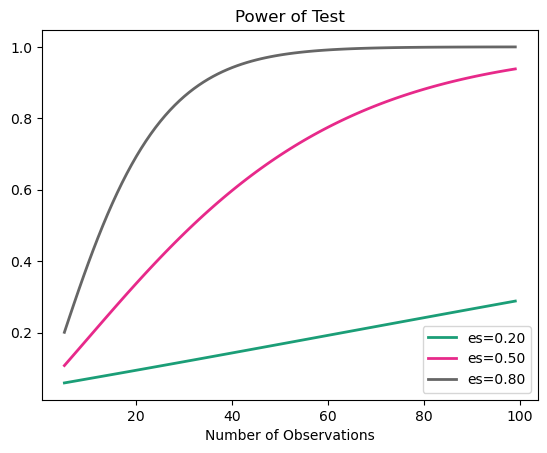

In [89]:
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.show()


<u>**Раздел 13. Анализ мощности для сбалансированного однофакторного дисперсионного анализа**<u>

70. Для однофакторного дисперсионного анализа, включающего 5 групп, нужно найти размер групп, при котором мощность составляет 0.8, размер эффекта – 0.25 и уровень значимости – 0.05. Для однофакторного дисперсионного анализа величина эффекта отражена в параметре f, который рассчитывается по формуле:
f=√((∑_(i=1)^k▒〖p_i (μ_i-μ)^2 〗)/σ^2 ),
p_i=n_i/N,
где k – число групп,
n_i – размер выборки в группе i,
N – общее число наблюдений,
μ_i – среднее значение для группы i,
μ – общее среднее,
σ^2 – дисперсия ошибок внутри групп.


In [90]:
k=5
power=0.8
effect=0.25
alpha=0.05

71. Создайте класс анализа мощности для сбалансированного однофакторного дисперсионного анализа с помощью функции FTestAnovaPower(). Результат запишите в переменную analysis.

In [91]:
from statsmodels.stats.power import FTestAnovaPower
analysis=FTestAnovaPower()

72.	Проведите анализ мощности для поиска объема выборки, воспользовавшись функцией solve_power(effect_size=effect, nobs=None, alpha=alpha, k_groups=k, power=power). Прокомментируйте результат.

In [92]:
result=analysis.solve_power(effect_size=effect, nobs=None, alpha=alpha, k_groups=k, power=power)
result

195.76699641261638

***Вывод: в выборке должно быть 195 наблюдений.***